In [20]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

# From Relational Algebra to SQL

# Database Management System (DBMS)

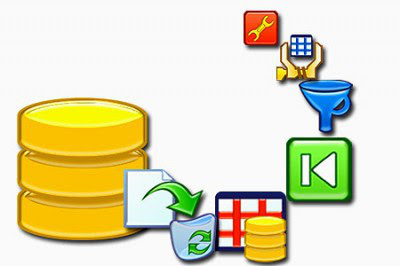

> A software system that enables users to define, create, maintain and control access to the database (Connolly and Beg)

# SQL

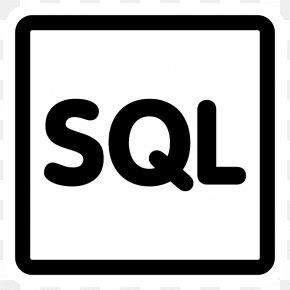

>  it is the standard language for relational database management systems (ANSI)

# SQL (Structured Query Language) (from WIkipedia)

Domain-specific language used in programming and designed for managing data held in a relational database management system (RDBMS)

it is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables.

The scope of SQL includes data query, data manipulation (insert, update and delete), data definition (schema creation and modification), and data access control. 

# Database Words

In [22]:
acronyms=pd.read_csv('datasets/db_acronyms.txt')

In [23]:
acronyms.head(10)

,acronym,definition
0,SQL,Structured Query Language
1,CRUD,Create Read Update Delete
2,BLOB,Binary Large OBject
3,CLOB,Character Large OBject
4,PK,Primary Key
5,FK,Foreign Key
6,DDL,Data Definition Language
7,DML,Data Manipulation Language
8,ACID,Atomicity Consistency Isolation Durability
9,BI,Business Intelligence


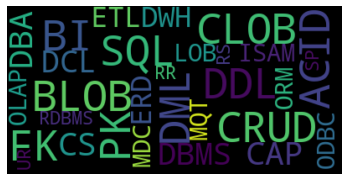

In [24]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(" ".join(acronyms['acronym']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

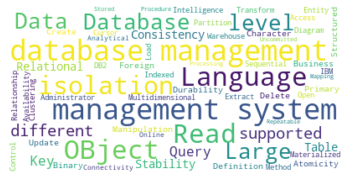

In [25]:
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(acronyms['definition']))
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# ACID
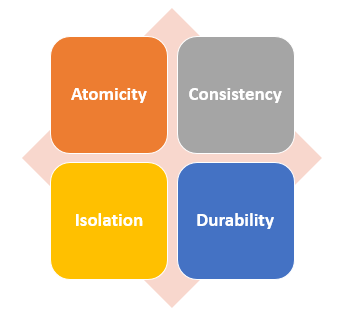

## Atomicity
> Atomicity means that you guarantee that either all of the transaction succeeds or none of it does. You don’t get part of it succeeding and part of it not. If one part of the transaction fails, the whole transaction fails. With atomicity, it’s either “all or nothing”.

## Consistency
> This ensures that you guarantee that all data will be consistent. All data will be valid according to all defined rules, including any constraints, cascades, and triggers that have been applied on the database.

## Isolation
> Guarantees that all transactions will occur in isolation. No transaction will be affected by any other transaction. So a transaction cannot read data from any other transaction that has not yet completed.

## Durability
> Durability means that, once a transaction is committed, it will remain in the system – even if there’s a system crash immediately following the transaction. Any changes from the transaction must be stored permanently. If the system tells the user that the transaction has succeeded, the transaction must have, in fact, succeeded.

![Image](images/sqlite.gif)

SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.

SQLite is the most used database engine in the world. SQLite is built into all mobile phones and most computers and comes bundled inside countless other applications that people use every day. 

The SQLite file format is stable, cross-platform, and backwards compatible and the developers pledge to keep it that way through at least the year 2050. SQLite database files are commonly used as containers to transfer rich content between systems and as a long-term archival format for data.

There are over 1 trillion (1e12) SQLite databases in active use.

The same thing can be done with an enterprise client/server database, of course. The advantage of SQLite is that it is easier to install and use and the resulting database is a single file that can be written to a USB memory stick or emailed to a colleague.

# Demo time
Credits
https://towardsdatascience.com/a-quick-guide-to-relational-algebra-operators-in-dbms-1ff2ddecaad7

# A simple database

![](https://miro.medium.com/max/4320/1*0OyX0b7yj516YRZ0Qkr5Dw.png)

# Create or connect to a database

In [ ]:
%sql sqlite:///datasets/ra.db

# Populate Tables

In [ ]:
%%sql

-- Create Member table
CREATE TABLE member(
   member_id INT PRIMARY KEY,
   name VARCHAR (50) NOT NULL,
   date_of_birth DATE NOT NULL
);

-- Add records to Member table
INSERT INTO member VALUES (1, 'Alice', '1995-03-03');
INSERT INTO member VALUES (2, 'Bob', '1993-03-05');
INSERT INTO member VALUES (3, 'Charlie', '1997-10-21');
INSERT INTO member VALUES (4, 'Mike', '1992-09-16');
INSERT INTO member VALUES (5, 'Katie', '1997-10-21');


-- Create Book table
CREATE TABLE book(
   book_id INT PRIMARY KEY,
   name VARCHAR (50) NOT NULL,
   author VARCHAR (50) NOT NULL
);

-- Add records to Book table
INSERT INTO book VALUES (1, 'Inferno', 'Dan Brown');
INSERT INTO book VALUES (2, 'Ash', 'Malinda Lo');
INSERT INTO book VALUES (3, 'Fences', 'August Wilson');
INSERT INTO book VALUES (4, 'Origin', 'Dan Brown');
INSERT INTO book VALUES (5, 'Inheritance', 'Malinda Lo');


-- Create Borrow table
CREATE TABLE borrow(
   member_id INT REFERENCES member(member_id),
   book_id INT REFERENCES book(book_id),
   borrow_date DATE NOT NULL,
   return_date DATE NOT NULL
);

-- Add records to Borrow table
INSERT INTO borrow VALUES (1, 1, '2020-03-02', '2020-03-12');
INSERT INTO borrow VALUES (3, 5, '2020-03-05', '2020-03-15');
INSERT INTO borrow VALUES (3, 3, '2020-03-10', '2020-03-20');
INSERT INTO borrow VALUES (4, 2, '2020-03-13', '2020-03-23');
INSERT INTO borrow VALUES (5, 4, '2020-03-13', '2020-03-13');

# Projection (π)
Projection is used to select the required columns of data from a relation. Note that projection removes duplicate data (tuples).

> Query: Member IDs of members who have borrowed books.

![](https://miro.medium.com/max/1400/1*wkOHHndu-7R3_5lqoYieCQ.png)

In [ ]:
%%sql 
SELECT * FROM borrow;

## Selection (σ)
Selection is used to select the required tuples of data from a relation. During selection, we can specify certain conditions that the data must satisfy.

> Query: Details of the members who were born on 21/10/1997.

![](https://miro.medium.com/max/1400/1*l9gUlavI2J5AtNKuJzgrUg.png)

In [ ]:
%%sql
SELECT * FROM member where date_of_birth >= '1997-01-01' and date_of_birth <= '1997-12-31';

# Rename (ρ)
Rename operation allows renaming a certain output relation.

> Query: Rename the Member relation as LibraryMemebr.

![](https://miro.medium.com/max/1400/1*kpMwm5Eov4ZiZUm_Q-QxTA.png)

In [ ]:
%%sql
WITH library_member AS (SELECT * FROM member) 

SELECT * FROM library_member;

# Cross product (✕)
Cross product is used to combine data from two different relations into one combined relation. If we consider two relations; A with n tuples and B with m tuples, A ✕ B will consist of n.m tuples.

> Query: Member ✕ Borrow

![](https://miro.medium.com/max/2000/1*j834czgYUPkNK2uI6f6VdQ.png)

In [ ]:
%%sql
SELECT * FROM member,borrow;

# Natural join (⋈)
Natural join between two or more relations will result in all the combination of tuples where they have equal values for the common attribute.

> Query: Member ⋈ Borrow

![](https://miro.medium.com/max/2000/1*px6PC9HJ1cXZ9HSlxxJzWw.png)

In [ ]:
%%sql
SELECT * FROM member NATURAL JOIN borrow;

# Conditional join (⋈c)
Conditional join is similar to the natural join but in the conditional join, we can specify any join condition with the operators greater than, less than, equal or not equal. You can combine conditions as well with AND (^) and OR (v) operators.

> Query: Borrowing details of members who have burrowed more than one book.

![](https://miro.medium.com/max/2000/1*L0cJ5SttgnntlJI6i6F_6A.png)

In [ ]:
%%sql
WITH 
B1 AS (SELECT * from borrow),
B2 AS (SELECT * from borrow)
SELECT * FROM B1 INNER JOIN B2 ON B1.member_id=B2.member_id AND B1.book_id<>B2.book_id;

# Union (⋃)
The union operation in RA is very similar to that of set theory. However, for the union of two relations, both the relations must have the same set of attributes.

> Query: Book IDs of the books borrowed by Charlie and Mike. 

![](https://miro.medium.com/max/1400/1*bkblBTLehk8gyEhQcTYAbw.png)

In [ ]:
%%sql
SELECT book_id FROM member natural join borrow where name='Charlie' 
UNION
SELECT book_id FROM member natural join borrow where name='Mike';

# Intersection (⋂)
The intersection operation in RA is very similar to that of set theory. However, for the intersection of two relations, both the relations must have the same set of attributes.

> Query: Member IDs of the members who have borrowed both the books “Fences” and “Inheritance”.

![](https://miro.medium.com/max/1400/1*_E18HHc9jqe4bMhtUaoNVg.png)

In [ ]:
%%sql
SELECT member_id FROM book natural join borrow where name='Fences' 
INTERSECT
SELECT member_id FROM book natural join borrow where name='Inheritance';

# Set difference (-)
The set difference operation in RA is very similar to that of set theory. However, for the set difference between two relations, both the relations must have the same set of attributes.

> Query: Member IDs of the members who have never borrowed books.

![](https://miro.medium.com/max/1400/1*lApz8Y5G1XYw1myYQrrgFw.png)

In [ ]:
%%sql
SELECT member_id,name,date_of_birth FROM member 
EXCEPT
SELECT member_id,name,date_of_birth FROM member natural join borrow;

SQL consists in 
- data definition language (DDL)
- data query language (DQL)
- data control language (DCL)
- data manipulation language (DML)

# Data Definition Language (DDL)
Subset of commands used to define/modify objects in a database (CREATE, DROP, ALTER, TRUNCATE)

## Create a table

`CREATE TABLE [table name] ( [column definitions] ) [table parameters]`

In [ ]:
%sql CREATE TABLE IF NOT EXISTS students(id INTEGER PRIMARY KEY,name TEXT,surname TEXT,course_id NUMERIC)

In [ ]:
%sql CREATE table IF NOT EXISTS courses(id INTEGER PRIMARY KEY, name TEXT)

## Drop a table

`DROP TABLE [table name]`

In [ ]:
%sql DROP TABLE students

# Alter a table 

`ALTER objecttype objectname parameters.`

In [ ]:
%sql ALTER TABLE students ADD email string 

# Let's give a look 

In [ ]:
%sql SELECT * FROM sqlite_master WHERE type='table'

# Data Manipulation Language (DML)
Subset of commands used to insert/update/delete objects in a database (INSERT, DELETE, UPDATE)

# INSERT
`INSERT INTO [table name](columns) values (value)`

In [ ]:
%sql INSERT INTO courses(name) VALUES ('MasterUpa')

# All fine ?

In [ ]:
%sql select * from courses;

In [ ]:
%sql INSERT INTO students(name,surname,email, course_id) values ('Slavo','Nicotra','salvatore.nicotra1@unict.it', 1)

# UPDATE
`UPDATE [table name] set values WHERE conditions`

In [ ]:
%sql select * from students 

In [ ]:
%sql UPDATE students set name='Salvo' where name='Slavo'

In [ ]:
# DELETE
`DELETE from [table name] WHERE conditions`

In [ ]:
%sql DELETE from students where id=1;

# Data Query Language (DQL)

# SELECT
``` SELECT [ ALL | DISTINCT |  TOP ] columns
FROM table
[ WHERE conditions ]
[ GROUP BY columns [HAVING conditions] ]
[ ORDER BY columns ];
```

# Where and order

In [ ]:
%sql INSERT INTO students(name,surname,email, course_id) values ('Harry','Potter','harry@howarts.com', 1)

In [ ]:
%sql select * from students order by name 

# Join

In [ ]:
%%sql 
select 
students.name, students.surname, students.email, courses.name as corso
from 
students
join courses  on students.course_id=courses.id

# Group By

In [ ]:
%%sql 
select uc.name,count(*)
from students ums 
join courses uc on ums.course_id=uc.id 
group by uc.name